In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
path = 'salaries.csv';
df = pd.read_csv(path);
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [13]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [15]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [17]:
df.duplicated().value_counts()

True     68726
False    64623
Name: count, dtype: int64

In [19]:
df.shape

(133349, 11)

In [21]:
df_ = df.drop_duplicates()

In [23]:
df_.shape

(64623, 11)

In [25]:
df_.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [27]:
df_['company_location'].unique()

array(['US', 'AU', 'CA', 'JP', 'GB', 'MX', 'NL', 'ES', 'FR', 'MT', 'LT',
       'PH', 'NZ', 'DE', 'LV', 'IE', 'MK', 'AT', 'PL', 'SK', 'BR', 'SI',
       'FI', 'HK', 'LS', 'IN', 'JM', 'CH', 'BE', 'PE', 'SG', 'PT', 'IT',
       'HU', 'RO', 'AR', 'ZA', 'PA', 'EE', 'LU', 'DZ', 'EG', 'CL', 'GR',
       'KE', 'CD', 'SE', 'KR', 'TW', 'NO', 'CZ', 'TR', 'CY', 'CO', 'DK',
       'AE', 'BG', 'ID', 'JO', 'RS', 'UA', 'PR', 'SV', 'EC', 'DO', 'MY',
       'XK', 'CR', 'ZM', 'AM', 'IL', 'LB', 'NG', 'HR', 'PK', 'HN', 'VE',
       'AS', 'SA', 'OM', 'BA', 'VN', 'GI', 'MU', 'RU', 'QA', 'GH', 'AD',
       'CF', 'TH', 'IR', 'BS', 'IQ', 'CN', 'MD'], dtype=object)

In [29]:
df_.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,64623.000000,6.462300e+04,64623.000000,64623.000000
mean,2024.360352,1.623083e+05,151233.085713,24.637513
std,0.733008,2.982224e+05,77532.442478,42.947751
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,9.640300e+04,96050.000000,0.000000
50%,2024.000000,1.399000e+05,138900.000000,0.000000
75%,2025.000000,1.920000e+05,190200.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [31]:
df_['company_location'].nunique()

95

In [33]:
mean_salaries_by_title = df_.groupby('job_title')[['salary', 'salary_in_usd']].mean().reset_index();
mean_salaries_by_title.head(10)

,job_title,salary,salary_in_usd
0,AI Architect,2.150576e+05,215552.513661
1,AI Content Writer,4.050667e+04,40506.666667
2,AI Data Engineer,9.000000e+04,94444.000000
3,AI Data Scientist,3.310500e+05,85704.400000
4,AI Developer,1.424367e+05,142925.219355
5,AI Engineer,2.284345e+05,166355.393258
6,AI Engineering Lead,2.000000e+06,23649.000000
7,AI Engineering Manager,1.485000e+05,179930.500000
8,AI Governance Lead,1.000000e+05,126582.000000
9,AI Governance Specialist,1.138417e+05,119290.833333


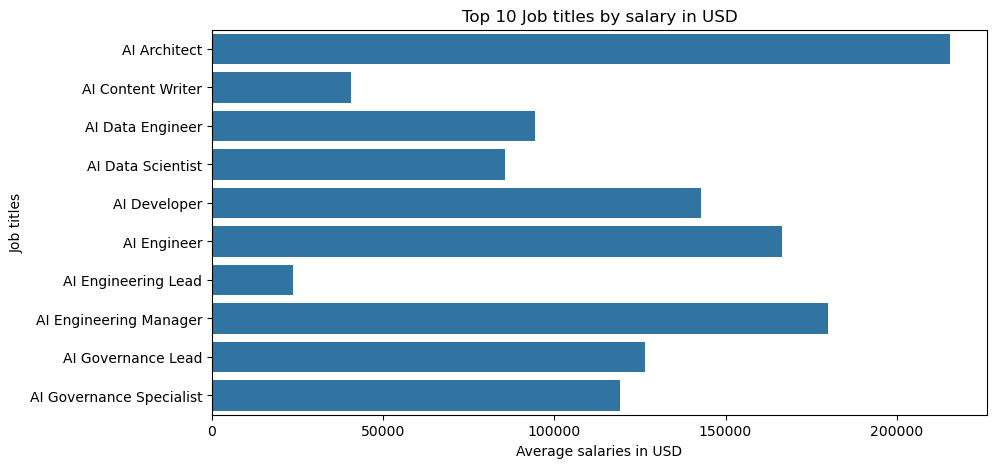

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(data=mean_salaries_by_title.head(10),legend=True, x='salary_in_usd', y='job_title', orient='h')
plt.title('Top 10 Job titles by salary in USD');
plt.ylabel('Job titles')
plt.xlabel('Average salaries in USD');
plt.xticks()
plt.show()

In [37]:
# Top 10 high paying jobs which are remote 100%
df_['remote_ratio'].unique()

array([100,   0,  50])

In [39]:
# df_.groupby('remote_ratio')[['salary_in_usd', 'company_location', 'company_size', 'employee_residence']].agg({
#     'salary_in_usd': 'mean',
#     'company_location': 'nunique',
#     'company_size': 'nunique',
#     'employee_residence': 'nunique',
# })
df_.groupby('remote_ratio')[['salary_in_usd', 'company_location', 'company_size', 'employee_residence']].value_counts()

remote_ratio  salary_in_usd  company_location  company_size  employee_residence
0             150000         US                M             US                    297
              120000         US                M             US                    278
              100000         US                M             US                    266
              160000         US                M             US                    243
              130000         US                M             US                    236
                                                                                  ... 
100           500000         CA                M             CA                      1
              600000         US                M             US                      1
              619000         US                M             US                      1
              625000         US                M             US                      1
              800000         CA                M  

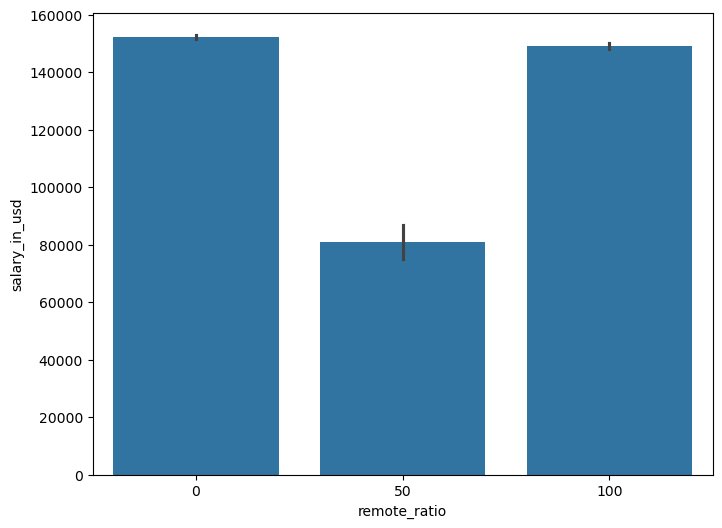

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_, x='remote_ratio', y='salary_in_usd')
plt.show()

In [43]:
df_.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [45]:
df_['work_year'].unique()

array([2025, 2024, 2022, 2023, 2020, 2021])

In [47]:
salaries_over_the_years = df_.groupby(['work_year', 'remote_ratio'])['salary_in_usd'].mean().reset_index();
salaries_over_the_years

,work_year,remote_ratio,salary_in_usd
0,2020,0,94258.111111
1,2020,50,86879.142857
2,2020,100,115214.083333
3,2021,0,106835.758621
4,2021,50,81180.958333
5,2021,100,108929.309735
6,2022,0,134448.709977
7,2022,50,83745.206349
8,2022,100,133544.967742
9,2023,0,155068.026483


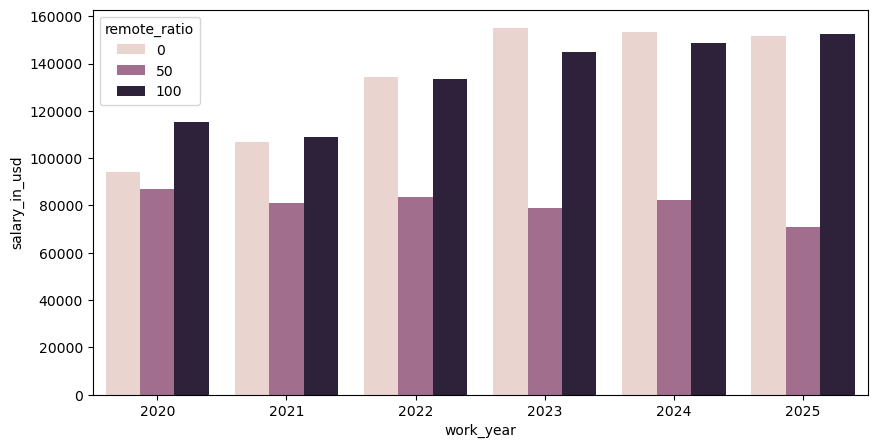

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(data=salaries_over_the_years, x='work_year', y='salary_in_usd', hue='remote_ratio');
plt.show();

<Axes: ylabel='salary_in_usd'>

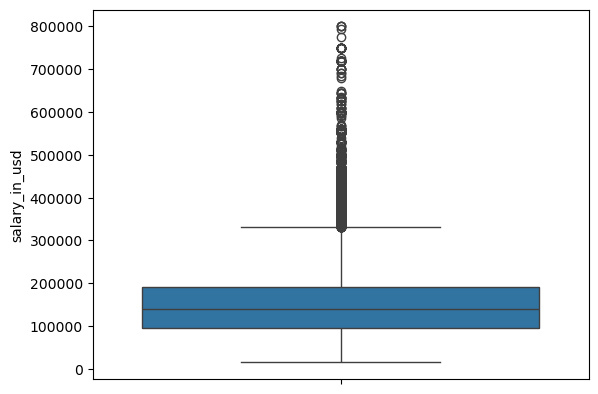

In [51]:
sns.boxplot(data=df_['salary_in_usd'])

In [53]:
df_.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression;

# features = pd.get_dummies(data=df_[['work_year', 'experience_level']], columns=['experience_level']).astype('int64');
features = data=df_[['work_year']];
y = df_['salary_in_usd'];
model = LinearRegression();
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42);
model.fit(X_train, y_train);

In [89]:
predictions = model.predict(X_test);

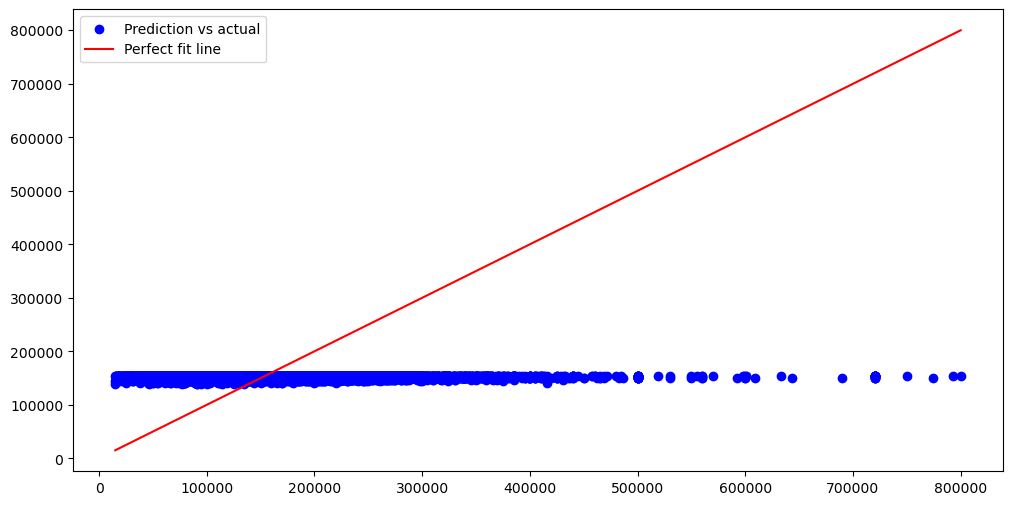

In [91]:
plt.figure(figsize=(12,6))

# plt.subplot(1,2,1)
plt.scatter(y_test, predictions, color='blue', label='Prediction vs actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect fit line')
plt.legend()
plt.show()

In [61]:
movies_df = pd.read_csv('movies.csv');
movies_df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [63]:
movies_df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [65]:
movies_df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [67]:
features_m = movies_df[['budget']];
y_m = movies_df['vote_average'];

X_train, X_test, y_train, y_test = train_test_split(features_m, y_m, test_size=0.2, random_state=42);
model.fit(X_train, y_train)

LinearRegression()

In [69]:
predictions_m = model.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


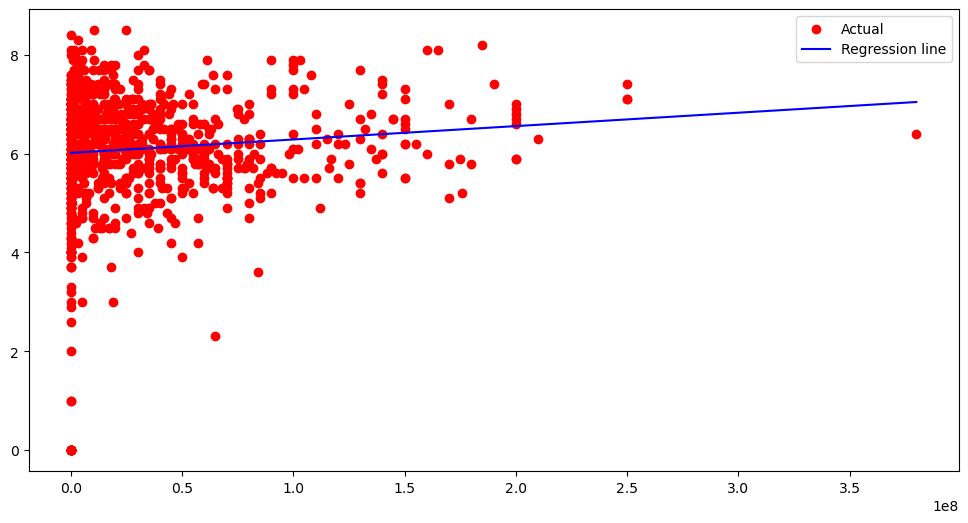

In [71]:
plt.figure(figsize=(12,6))
plt.scatter(X_test, y_test, color='red', label='Actual')
x_line = np.linspace(X_test.min(), X_test.max(), 1000).reshape(-1,1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='blue', label='Regression line')
plt.legend()
plt.show()

In [73]:
df_.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [75]:
features = pd.get_dummies(data=df_[['work_year', 'experience_level']], columns=['experience_level']).astype('int64');
y = df_['salary_in_usd'];

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42);

In [77]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear', C=1.0);
svr_model.fit(X_train, y_train);

In [79]:
preds = svr_model.predict(X_test)

In [83]:
preds.shape

(12925,)

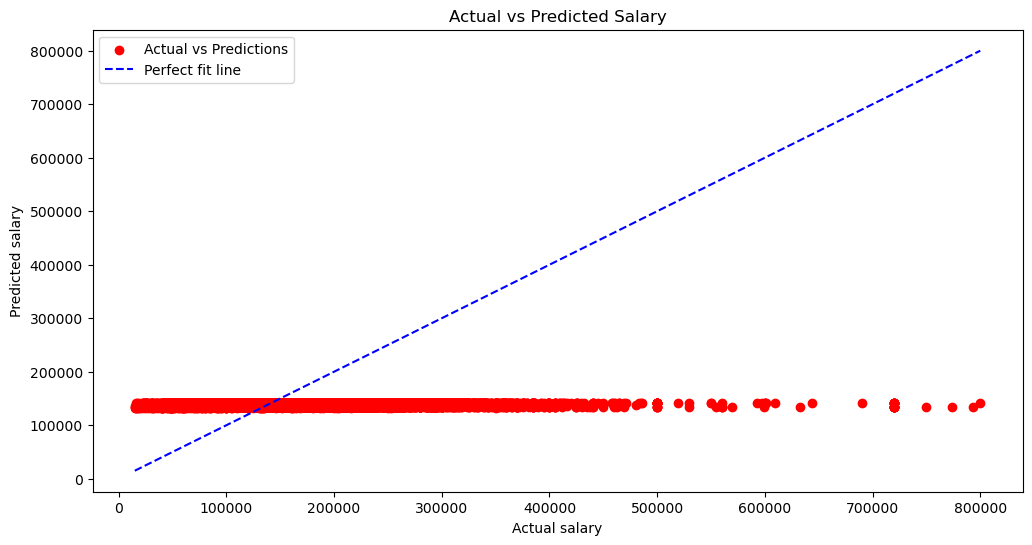

In [85]:
plt.figure(figsize=(12,6))

plt.scatter(y_test, preds, color='red', label='Actual vs Predictions');
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', label='Perfect fit line', linestyle='--');
plt.title('Actual vs Predicted Salary');
plt.xlabel('Actual salary');
plt.ylabel('Predicted salary');
plt.legend();
plt.show();